## Work in Progress....Any suggestions are welcome

## Introduction

Financial institutions incur significant losses due to the default of vehicle loans. This has led to the tightening up of vehicle loan underwriting and increased vehicle loan rejection rates. The need for a better credit risk scoring model is also raised by these institutions. This warrants a study to estimate the determinants of vehicle loan default. A financial institution has hired you to accurately predict the probability of loanee/borrower defaulting on a vehicle loan in the first EMI (Equated Monthly Instalments) on the due date. Following Information regarding the loan and loanee are provided:

* Loanee Information (Demographic data like age, income, Identity proof etc.)
* Loan Information (Disbursal details, amount, EMI, loan to value ratio etc.)
* Bureau data & history (Bureau score, number of active accounts, the status of other loans, credit history etc.)

Doing so will ensure that clients capable of repayment are not rejected and important determinants can be identified which can be further used for minimising the default rates.

## Data Dictionary
...

## Importing the required packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import datetime
import seaborn as sns

## Importing the data

In [2]:
print(os.listdir("../input"))
Train_df= pd.read_csv('../input/train.csv')
Test_df= pd.read_csv('../input/test.csv')

['Data Dictionary.xlsx', 'train.csv', 'test.csv']


## Dimensions of the data

In [3]:
print(Train_df.shape)
print(Test_df.shape)

(233154, 41)
(112392, 40)


## Appending the Train and Test data

In [4]:
Train_df['Train_Test']='Train'
Test_df['Train_Test']='Test'
df= Train_df.append(Test_df)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


## Glimpse of the data

In [5]:
df.head()

,AADHAR_FLAG,ASSET_COST,AVERAGE_ACCT_AGE,BRANCH_ID,CREDIT_HISTORY_LENGTH,CURRENT_PINCODE_ID,DATE_OF_BIRTH,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,DISBURSAL_DATE,DISBURSED_AMOUNT,DRIVING_FLAG,EMPLOYEE_CODE_ID,EMPLOYMENT_TYPE,LOAN_DEFAULT,LTV,MANUFACTURER_ID,MOBILENO_AVL_FLAG,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,PAN_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PERFORM_CNS_SCORE_DESCRIPTION,PRIMARY_INSTAL_AMT,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,PRI_SANCTIONED_AMOUNT,SEC_ACTIVE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,SEC_INSTAL_AMT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_SANCTIONED_AMOUNT,STATE_ID,SUPPLIER_ID,Train_Test,UNIQUEID,VOTERID_FLAG
0,1,58400,0yrs 0mon,67,0yrs 0mon,1441,01-01-1984,0,03-08-2018,50578,0,1998,Salaried,0.0,89.55,45,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22807,Train,420825,0
1,1,65550,1yrs 11mon,67,1yrs 11mon,1502,31-07-1985,1,26-09-2018,47145,0,1998,Self employed,1.0,73.23,45,1,0,0,0,0,598,I-Medium Risk,1991,1,27600,50200,1,1,50200,0,0,0,0,0,0,0,6,22807,Train,537409,0
2,1,61360,0yrs 0mon,67,0yrs 0mon,1497,24-08-1985,0,01-08-2018,53278,0,1998,Self employed,0.0,89.63,45,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22807,Train,417566,0
3,1,66113,0yrs 8mon,67,1yrs 3mon,1501,30-12-1993,0,26-10-2018,57513,0,1998,Self employed,1.0,88.48,45,1,0,1,0,0,305,L-Very High Risk,31,0,0,0,3,0,0,0,0,0,0,0,0,0,6,22807,Train,624493,0
4,1,60300,0yrs 0mon,67,0yrs 0mon,1495,09-12-1977,0,26-09-2018,52378,0,1998,Self employed,1.0,88.39,45,1,0,1,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,22807,Train,539055,0


## Descriptive Stats

In [6]:
df.describe()

,AADHAR_FLAG,ASSET_COST,BRANCH_ID,CURRENT_PINCODE_ID,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,DISBURSED_AMOUNT,DRIVING_FLAG,EMPLOYEE_CODE_ID,LOAN_DEFAULT,LTV,MANUFACTURER_ID,MOBILENO_AVL_FLAG,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,PAN_FLAG,PASSPORT_FLAG,PERFORM_CNS_SCORE,PRIMARY_INSTAL_AMT,PRI_ACTIVE_ACCTS,PRI_CURRENT_BALANCE,PRI_DISBURSED_AMOUNT,PRI_NO_OF_ACCTS,PRI_OVERDUE_ACCTS,PRI_SANCTIONED_AMOUNT,SEC_ACTIVE_ACCTS,SEC_CURRENT_BALANCE,SEC_DISBURSED_AMOUNT,SEC_INSTAL_AMT,SEC_NO_OF_ACCTS,SEC_OVERDUE_ACCTS,SEC_SANCTIONED_AMOUNT,STATE_ID,SUPPLIER_ID,UNIQUEID,VOTERID_FLAG
count,345546.000000,3.455460e+05,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,233154.000000,345546.00000,345546.000000,345546.0,345546.000000,345546.000000,345546.000000,345546.000000,345546.000000,3.455460e+05,345546.000000,3.455460e+05,3.455460e+05,345546.000000,345546.000000,3.455460e+05,345546.000000,3.455460e+05,3.455460e+05,3.455460e+05,345546.000000,345546.000000,3.455460e+05,345546.000000,345546.000000,345546.000000,345546.000000
mean,0.849852,7.629484e+04,74.876752,3272.345381,0.095660,54916.377391,0.021117,1621.741403,0.217071,74.92991,68.812725,1.0,0.360065,0.212959,0.113311,0.002058,289.032062,1.249773e+04,1.003586,1.602702e+05,2.095608e+05,2.371201,0.155146,2.096509e+05,0.022709,4.565299e+03,6.038715e+03,2.727354e+02,0.047528,0.005921,6.133302e+03,7.247122,19705.205342,593106.042648,0.137148
std,0.357217,1.873864e+04,70.426229,2240.489856,0.383594,13045.957158,0.143776,1024.408918,0.412252,11.31522,22.142130,0.0,0.920797,0.717365,0.316972,0.045314,338.841228,1.997545e+05,1.877087,9.253457e+05,2.047483e+06,5.013630,0.543333,2.043866e+06,0.283288,1.612026e+05,1.889114e+05,1.626126e+04,0.561836,0.100497,1.893427e+05,4.547494,3513.984528,101481.557990,0.344004
min,0.000000,3.700000e+04,1.000000,1.000000,0.000000,11613.000000,0.000000,1.000000,0.000000,10.03000,45.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,-6.678296e+06,0.000000e+00,0.000000,0.000000,-4.815000e+05,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1.000000,10524.000000,417428.000000,0.000000
25%,1.000000,6.628200e+04,15.000000,1449.000000,0.000000,47645.000000,0.000000,737.000000,0.000000,69.28000,45.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,4.000000,16565.000000,505386.250000,0.000000
50%,1.000000,7.154100e+04,64.000000,2790.000000,0.000000,54303.000000,0.000000,1511.000000,0.000000,77.14000,86.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,6.000000,20470.000000,592918.500000,0.000000
75%,1.000000,7.960500e+04,135.000000,5458.000000,0.000000,60947.000000,0.000000,2470.000000,0.000000,83.69000,86.000000,1.0,0.000000,0.000000,0.000000,0.000000,679.000000,1.946000e+03,1.000000,3.136450e+04,5.764575e+04,3.000000,0.000000,5.941675e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,10.000000,23049.000000,680501.750000,0.000000
max,1.000000,1.628992e+06,261.000000,7345.000000,20.000000,990572.000000,1.000000,3923.000000,1.000000,95.00000,156.000000,1.0,35.000000,36.000000,1.000000,1.000000,890.000000,8.526233e+07,144.000000,9.652492e+07,1.000000e+09,453.000000,25.000000,1.000000e+09,36.000000,3.603285e+07,5.794500e+07,5.390000e+06,57.000000,8.000000,5.794500e+07,22.000000,24901.000000,769909.000000,1.000000


## Missing value check

In [7]:
missing_var= df.isnull().sum()
print(missing_var)

AADHAR_FLAG                                 0
ASSET_COST                                  0
AVERAGE_ACCT_AGE                            0
BRANCH_ID                                   0
CREDIT_HISTORY_LENGTH                       0
CURRENT_PINCODE_ID                          0
DATE_OF_BIRTH                               0
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS         0
DISBURSAL_DATE                              0
DISBURSED_AMOUNT                            0
DRIVING_FLAG                                0
EMPLOYEE_CODE_ID                            0
EMPLOYMENT_TYPE                         11104
LOAN_DEFAULT                           112392
LTV                                         0
MANUFACTURER_ID                             0
MOBILENO_AVL_FLAG                           0
NEW_ACCTS_IN_LAST_SIX_MONTHS                0
NO_OF_INQUIRIES                             0
PAN_FLAG                                    0
PASSPORT_FLAG                               0
PERFORM_CNS_SCORE                 

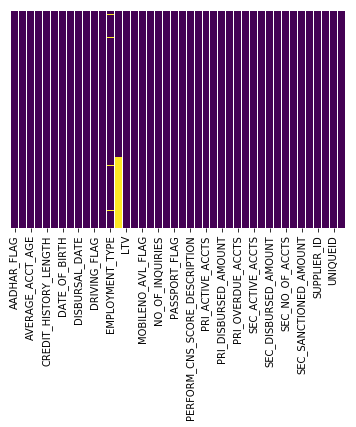

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We have missing values only in the variable "EMPLOYMENT_TYPE" which we will impute it using the backward fill method

In [9]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna(method = 'bfill')

## Structure of the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345546 entries, 0 to 112391
Data columns (total 42 columns):
AADHAR_FLAG                            345546 non-null int64
ASSET_COST                             345546 non-null int64
AVERAGE_ACCT_AGE                       345546 non-null object
BRANCH_ID                              345546 non-null int64
CREDIT_HISTORY_LENGTH                  345546 non-null object
CURRENT_PINCODE_ID                     345546 non-null int64
DATE_OF_BIRTH                          345546 non-null object
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    345546 non-null int64
DISBURSAL_DATE                         345546 non-null object
DISBURSED_AMOUNT                       345546 non-null int64
DRIVING_FLAG                           345546 non-null int64
EMPLOYEE_CODE_ID                       345546 non-null int64
EMPLOYMENT_TYPE                        345546 non-null object
LOAN_DEFAULT                           233154 non-null float64
LTV                         

We need to convert the data type of the categorical variables into category 

In [11]:
for col in ['UNIQUEID','AADHAR_FLAG', 'BRANCH_ID', 'CURRENT_PINCODE_ID', 'DRIVING_FLAG',
            'EMPLOYEE_CODE_ID', 'LOAN_DEFAULT', 'MANUFACTURER_ID' , 
            'MOBILENO_AVL_FLAG', 'STATE_ID', 'SUPPLIER_ID', 'VOTERID_FLAG',
            'PAN_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
            'EMPLOYMENT_TYPE']:
    df[col] = df[col].astype('category')

Similarly, we need to convert the date time variables into its respective data type.

In [12]:
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

## Analysis of Categorical Variables

We will begin by checking the number of unique categories in the categorical variables.

In [13]:
df.select_dtypes(include=['category']).nunique()

AADHAR_FLAG                           2
BRANCH_ID                            82
CURRENT_PINCODE_ID                 7096
DRIVING_FLAG                          2
EMPLOYEE_CODE_ID                   3398
EMPLOYMENT_TYPE                       2
LOAN_DEFAULT                          2
MANUFACTURER_ID                      12
MOBILENO_AVL_FLAG                     1
PAN_FLAG                              2
PASSPORT_FLAG                         2
PERFORM_CNS_SCORE_DESCRIPTION        20
STATE_ID                             22
SUPPLIER_ID                        3089
UNIQUEID                         345546
VOTERID_FLAG                          2
dtype: int64

We will proceed to drop those variables that have too many categories. These will only add noise to the model.

In [14]:
df=df.drop(['BRANCH_ID','CURRENT_PINCODE_ID','EMPLOYEE_CODE_ID','SUPPLIER_ID'],axis=1)

There are multiple categories in the variable 'PERFORM_CNS_SCORE_DESCRIPTION' which are similar and can be clubbed.

In [15]:
df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

No Bureau History Available                                174843
C-Very Low Risk                                             23870
A-Very Low Risk                                             21683
D-Very Low Risk                                             16472
B-Very Low Risk                                             13696
M-Very High Risk                                            12808
F-Low Risk                                                  12176
K-High Risk                                                 12141
H-Medium Risk                                               10142
E-Low Risk                                                   8393
I-Medium Risk                                                8260
G-Low Risk                                                   5795
J-High Risk                                                  5526
Not Scored: Sufficient History Not Available                 5025
Not Scored: Not Enough Info available on the customer        4940
Not Scored

In [16]:
df = df.replace({'PERFORM_CNS_SCORE_DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})
df.PERFORM_CNS_SCORE_DESCRIPTION.value_counts()

Not Scored    192802
Low           102085
Medium         18402
High           17667
Very High      14590
Name: PERFORM_CNS_SCORE_DESCRIPTION, dtype: int64

## Analysis of Date Time Variables

We will convert the variables 'AVERAGE_ACCT_AGE' and 'CREDIT_HISTORY_LENGTH' in number of months from its present format.

In [17]:
df['AVERAGE_ACCT_AGE']=df['AVERAGE_ACCT_AGE'].map(lambda x : re.sub("[^0-9]+"," ",x))
df['AVERAGE_ACCT_AGE']=df['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[0].astype(int)*12+df['AVERAGE_ACCT_AGE'].str.split(" ",expand=True)[1].astype(int)

df['CREDIT_HISTORY_LENGTH']=df['CREDIT_HISTORY_LENGTH'].map(lambda x : re.sub("[^0-9]+"," ",x))
df['CREDIT_HISTORY_LENGTH']=df['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[0].astype(int)*12+df['CREDIT_HISTORY_LENGTH'].str.split(" ",expand=True)[1].astype(int)

Next we will use the variables 'DATE_OF_BIRTH' and 'DISBURSAL_DATE' to calculate the age of the customer and the age of the loan respectively.

In [18]:
df['TODAY']=pd.to_datetime(datetime.date.today())

df['AGE']=df['TODAY']-df['DATE_OF_BIRTH']
new = df["AGE"].astype(str).str.split(" ", n = 1, expand = True)
df['AGE']=new[0].astype(int)

df['LOAN_AGE']=df['TODAY']-df['DISBURSAL_DATE']
new = df["LOAN_AGE"].astype(str).str.split(" ", n = 1, expand = True)
df['LOAN_AGE']=new[0].astype(int)

## Correlation

                                     ASSET_COST    ...     LOAN_AGE
ASSET_COST                             1.000000    ...    -0.049328
AVERAGE_ACCT_AGE                      -0.013397    ...     0.006179
CREDIT_HISTORY_LENGTH                 -0.020556    ...     0.015093
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS   -0.003931    ...     0.007295
DISBURSED_AMOUNT                       0.756399    ...    -0.066562
LTV                                   -0.284826    ...    -0.006150
NEW_ACCTS_IN_LAST_SIX_MONTHS          -0.019657    ...     0.020021
NO_OF_INQUIRIES                       -0.013723    ...    -0.011730
PERFORM_CNS_SCORE                     -0.042400    ...     0.004287
PRIMARY_INSTAL_AMT                    -0.003445    ...     0.006096
PRI_ACTIVE_ACCTS                      -0.017822    ...     0.020970
PRI_CURRENT_BALANCE                   -0.004335    ...     0.006273
PRI_DISBURSED_AMOUNT                  -0.001533    ...     0.003541
PRI_NO_OF_ACCTS                       -0.023737 

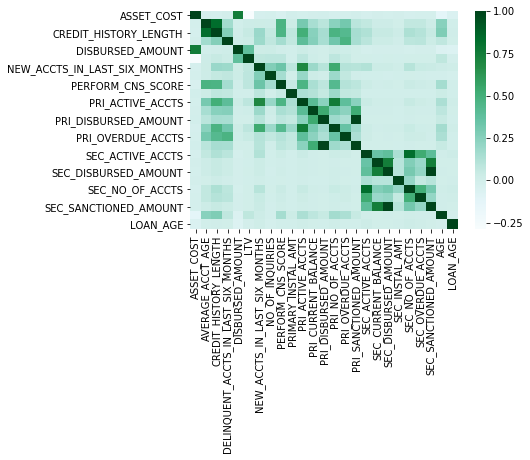

In [19]:
print(df.corr())
sns.heatmap(df.corr(), cmap='BuGn')

## Variance Infaltion Factor

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_Numeric=pd.DataFrame(df[['ASSET_COST',
'AVERAGE_ACCT_AGE',
'CREDIT_HISTORY_LENGTH',
'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
'DISBURSED_AMOUNT','LTV','NEW_ACCTS_IN_LAST_SIX_MONTHS',
'NO_OF_INQUIRIES','PERFORM_CNS_SCORE',
'PRIMARY_INSTAL_AMT',
'PRI_ACTIVE_ACCTS',
'PRI_CURRENT_BALANCE',
'PRI_DISBURSED_AMOUNT',
'PRI_NO_OF_ACCTS',
'PRI_OVERDUE_ACCTS',
'PRI_SANCTIONED_AMOUNT',
'SEC_ACTIVE_ACCTS',
'SEC_CURRENT_BALANCE',
'SEC_DISBURSED_AMOUNT',
'SEC_INSTAL_AMT',
'SEC_NO_OF_ACCTS',
'SEC_OVERDUE_ACCTS',
'SEC_SANCTIONED_AMOUNT',
'AGE',
'LOAN_AGE']])
X = df_Numeric.assign(const=0)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


ASSET_COST                               67.062810
AVERAGE_ACCT_AGE                          5.582080
CREDIT_HISTORY_LENGTH                     6.646198
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS       1.507943
DISBURSED_AMOUNT                        117.333381
LTV                                      63.261557
NEW_ACCTS_IN_LAST_SIX_MONTHS              2.747935
NO_OF_INQUIRIES                           1.194311
PERFORM_CNS_SCORE                         2.885253
PRIMARY_INSTAL_AMT                        1.048806
PRI_ACTIVE_ACCTS                          5.866673
PRI_CURRENT_BALANCE                       1.703864
PRI_DISBURSED_AMOUNT                    372.362172
PRI_NO_OF_ACCTS                           3.277059
PRI_OVERDUE_ACCTS                         1.733781
PRI_SANCTIONED_AMOUNT                   369.419913
SEC_ACTIVE_ACCTS                          3.844870
SEC_CURRENT_BALANCE                       2.294502
SEC_DISBURSED_AMOUNT                   2073.605814
SEC_INSTAL_AMT                 

## Event Imbalance Check

              LOAN_DEFAULT  PERCENTAGE_CONTRIBUTION
LOAN_DEFAULT                                       
0.0                 182543                 0.782929
1.0                  50611                 0.217071


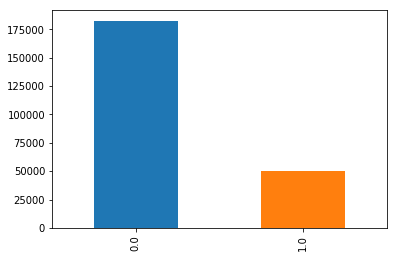

In [21]:
Event_Imbalance = df.groupby('LOAN_DEFAULT').agg({'LOAN_DEFAULT':'count'})
Event_Imbalance['PERCENTAGE_CONTRIBUTION']=Event_Imbalance['LOAN_DEFAULT']/sum(Event_Imbalance['LOAN_DEFAULT'])
print(Event_Imbalance)
df.LOAN_DEFAULT.value_counts().plot(kind='bar')

The event and non-event ratio is 78% to 22% and hence its absolutely fine.

In [22]:
Predictors= df[['AADHAR_FLAG','DRIVING_FLAG','MOBILENO_AVL_FLAG','STATE_ID',
                'VOTERID_FLAG','PAN_FLAG','PASSPORT_FLAG', 'PERFORM_CNS_SCORE_DESCRIPTION',
                'EMPLOYMENT_TYPE']]

One_hot_encoded_training_predictors = pd.get_dummies(Predictors)

df=pd.merge(df[['ASSET_COST','AVERAGE_ACCT_AGE',
'CREDIT_HISTORY_LENGTH','DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
'DISBURSED_AMOUNT','LTV','NEW_ACCTS_IN_LAST_SIX_MONTHS','NO_OF_INQUIRIES','PERFORM_CNS_SCORE',
'PRIMARY_INSTAL_AMT','PRI_ACTIVE_ACCTS','PRI_CURRENT_BALANCE','PRI_DISBURSED_AMOUNT',
'PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS','PRI_SANCTIONED_AMOUNT','SEC_ACTIVE_ACCTS',
'SEC_CURRENT_BALANCE','SEC_DISBURSED_AMOUNT','SEC_INSTAL_AMT','SEC_NO_OF_ACCTS',
'SEC_OVERDUE_ACCTS','SEC_SANCTIONED_AMOUNT','AGE','LOAN_AGE','LOAN_DEFAULT','Train_Test']],
One_hot_encoded_training_predictors,left_index=True, right_index=True)


## Splitting into Train and Test data

In [23]:
Train_df= df[df.Train_Test=='Train']
Train_df=Train_df.drop(['Train_Test'],axis=1)
Test_df= df[df.Train_Test=='Test']
Test_df=Test_df.drop(['Train_Test'],axis=1)

In [24]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(Train_df.drop('LOAN_DEFAULT',axis=1),Train_df['LOAN_DEFAULT'],
                                                    test_size=0.30,random_state=101)

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_Train, Y_Train)


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_Train,X_Train)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.500855
         Iterations 7


/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           LOAN_DEFAULT   No. Observations:               241882
Model:                          Logit   Df Residuals:                   241825
Method:                           MLE   Df Model:                           56
Date:                Fri, 07 Jun 2019   Pseudo R-squ.:                 0.03231
Time:                        15:08:40   Log-Likelihood:            -1.2115e+05
converged:                       True   LL-Null:                   -1.2519e+05
                                        LLR p-value:                     0.000
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
ASSET_COST                                1.252e-05   1.49e-06      8.376      0.000    9.59e-06    1.54e-05
AVERAGE_ACCT_AGE                             0.0074      0.001     10.294      0.000       0.006       0.009
CREDIT_HISTORY_LENGTH                       -0.0063      0.000    -13.542      0.000      -0.007      -0.005
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS          0.2468      0.015     16.076      0.000       0.217       0.277
DISBURSED_AMOUNT                         -8.969e-06   2.23e-06     -4.026      0.000   -1.33e-05    -4.6e-06
LTV                                          0.0371      0.002     20.916      0.000       0.034       0.041
NEW_ACCTS_IN_LAST_SIX_MONTHS                 0.0084      0.009      0.919      0.358      -0.010       0.026
NO_OF_INQUIRIES                              0.1515      0.007     22.120      0.000       0.138       0.165
PERFORM_CNS_SCORE                           -0.0003   2.42e-05    -13.476      0.000      -0.000      -0.000
PRIMARY_INSTAL_AMT                        6.638e-09   4.44e-08      0.149      0.881   -8.04e-08    9.37e-08
PRI_ACTIVE_ACCTS                            -0.0568      0.007     -8.562      0.000      -0.070      -0.044
PRI_CURRENT_BALANCE                      -9.952e-08   1.08e-08     -9.185      0.000   -1.21e-07   -7.83e-08
PRI_DISBURSED_AMOUNT                     -4.333e-08   8.39e-08     -0.516      0.606   -2.08e-07    1.21e-07
PRI_NO_OF_ACCTS                             -0.0048      0.002     -2.606      0.009      -0.008      -0.001
PRI_OVERDUE_ACCTS                            0.2163      0.012     17.644      0.000       0.192       0.240
PRI_SANCTIONED_AMOUNT                     4.759e-08   8.39e-08      0.567      0.571   -1.17e-07    2.12e-07
SEC_ACTIVE_ACCTS                             0.0474      0.036      1.304      0.192      -0.024       0.119
SEC_CURRENT_BALANCE                      -8.819e-08   1.26e-07     -0.703      0.482   -3.34e-07    1.58e-07
SEC_DISBURSED_AMOUNT                      4.191e-06   1.77e-06      2.369      0.018    7.23e-07    7.66e-06
SEC_INSTAL_AMT                            1.381e-07   4.05e-07      0.341      0.733   -6.56e-07    9.33e-07
SEC_NO_OF_ACCTS                             -0.0276      0.018     -1.531      0.126      -0.063       0.008
SEC_OVERDUE_ACCTS                            0.0982      0.055      1.773      0.076      -0.010       0.207
SEC_SANCTIONED_AMOUNT                    -4.205e-06   1.76e-06     -2.383      0.017   -7.66e-06   -7.46e-07
AGE                                      -2.337e-05   1.51e-06    -15.477      0.000   -2.63e-05   -2.04e-05
LOAN_AGE                                    -0.0005   9.08e-05     -5.816      0.000      -0.001      -0.000
AADHAR_FLAG_0                              -25.3792   1.61e+05     -0.000      1.000   -3.16e+05    3.16e+05
AADHAR_FLAG_1                              -25.4466   1.59e+05     -0.000      1

## Confusion Matrix

In [27]:

from sklearn.metrics import classification_report
predictions = logreg.predict(X_Train)
print(classification_report(Y_Train,predictions))
print("Accuracy:",metrics.accuracy_score(Y_Train, predictions))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88    190422
         1.0       0.50      0.00      0.00     51460

   micro avg       0.79      0.79      0.79    241882
   macro avg       0.64      0.50      0.44    241882
weighted avg       0.73      0.79      0.69    241882

Accuracy: 0.7872516350947983


In [28]:
from sklearn.metrics import confusion_matrix
predictions = logreg.predict(X_Train)
print(confusion_matrix (Y_Train, predictions))

[[190420      2]
 [ 51458      2]]
